In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("talk")
plt.style.use('ggplot')
mpl.rcParams['axes.labelpad']='20'

In [2]:
df = pd.read_csv("../datos/accidentes_2018.csv")

In [3]:
df.head()

,OBJECTID,X,Y,RADICADO,HORA,DIA_NOMBRE,PERIODO,CLASE,DIRECCION,DIRECCION_ENC,CBML,TIPO_GEOCOD,GRAVEDAD,BARRIO,COMUNA,DISENO,MES,DIA,FECHA,MES_NOMBRE
0,550556,833195.78,1184350.27,1612819.0,01:30 PM,DOMINGO,2018,Choque,CR 70 CL 55,CR 070 055 000 00000,1101,Malla vial,HERIDO,Carlos E. Restrepo,Laureles Estadio,Interseccion,1,14,2018-01-14T00:00:00.000Z,NaN
1,550557,833455.19,1187884.37,1612866.0,01:30 PM,DOMINGO,2018,Choque,CR 79 CL 95,CR 079 095 000 00000,0606,Malla vial,SOLO DAÑOS,San Martín de Porres,Doce de Octubre,Tramo de via,1,14,2018-01-14T00:00:00.000Z,NaN
2,550558,835882.26,1183346.78,1612809.0,02:30 PM,DOMINGO,2018,Caida Ocupante,CR 43 CL 57,CR 043 057 000 00000,1017,Malla vial,HERIDO,Los Ángeles,La Candelaria,Tramo de via,1,14,2018-01-14T00:00:00.000Z,NaN
3,550559,831732.26,1180061.86,1612812.0,02:30 PM,DOMINGO,2018,Otro,CR 76 CL 16,CR 076 016 000 00000,1605,Malla vial,HERIDO,San Bernardo,Belén,Interseccion,1,14,2018-01-14T00:00:00.000Z,NaN
4,550560,835719.88,1181651.42,1612817.0,02:37 PM,DOMINGO,2018,Choque,CR 36 CL 39,CR 036 039 000 00000,0912,Malla vial,SOLO DAÑOS,El Salvador,Buenos Aires,Tramo de via,1,14,2018-01-14T00:00:00.000Z,NaN


In [4]:
df_choques = df[df["CLASE"]=="Choque"]
df_choques.loc[:,"HORA"] = df_choques.loc[:,"HORA"].str.replace(".", "")
df_choques.loc[:,"HORA"] = df_choques.loc[:,"HORA"].str.replace(" ", "")
df_choques.loc[:,'HORA'] =  pd.to_datetime(df_choques.loc[:,"HORA"])
# df_choques.loc[:,'HORA'] =  df_choques.loc[:,'HORA'].dt.time
df_choques.loc[:,"FECHA"] = pd.to_datetime(df_choques.loc[:,"FECHA"])
df_choques.loc[:,"FECHA_norm"] = df_choques.loc[:,"FECHA"].dt.strftime('%m-%d')

df_choques["SEMANA"] = df_choques["FECHA"].dt.week
df_choques.head()

/home/davinchi/Documents/Projects/maricaditas_varias/Datatrooper/venv/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/davinchi/Documents/Projects/maricaditas_varias/Datatrooper/venv/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/davinchi/Documents/Projects/maricaditas_varias/Datatrooper/venv/lib/python3.7/site-packages/ipykernel_

,OBJECTID,X,Y,RADICADO,HORA,DIA_NOMBRE,PERIODO,CLASE,DIRECCION,DIRECCION_ENC,...,GRAVEDAD,BARRIO,COMUNA,DISENO,MES,DIA,FECHA,MES_NOMBRE,FECHA_norm,SEMANA
0,550556,833195.78,1184350.27,1612819.0,2019-11-17 13:30:00,DOMINGO,2018,Choque,CR 70 CL 55,CR 070 055 000 00000,...,HERIDO,Carlos E. Restrepo,Laureles Estadio,Interseccion,1,14,2018-01-14 00:00:00+00:00,NaN,01-14,2
1,550557,833455.19,1187884.37,1612866.0,2019-11-17 13:30:00,DOMINGO,2018,Choque,CR 79 CL 95,CR 079 095 000 00000,...,SOLO DAÑOS,San Martín de Porres,Doce de Octubre,Tramo de via,1,14,2018-01-14 00:00:00+00:00,NaN,01-14,2
4,550560,835719.88,1181651.42,1612817.0,2019-11-17 14:37:00,DOMINGO,2018,Choque,CR 36 CL 39,CR 036 039 000 00000,...,SOLO DAÑOS,El Salvador,Buenos Aires,Tramo de via,1,14,2018-01-14 00:00:00+00:00,NaN,01-14,2
6,550563,832427.43,1182518.39,1612823.0,2019-11-17 15:30:00,DOMINGO,2018,Choque,CQ 2 CR 72,CQ 002 072 000 00000,...,SOLO DAÑOS,Bolivariana,Laureles Estadio,Interseccion,1,14,2018-01-14 00:00:00+00:00,NaN,01-14,2
7,550564,834583.92,1181457.02,1612825.0,2019-11-17 16:00:00,DOMINGO,2018,Choque,CL 34 CR 46,CL 034 046 000 00000,...,SOLO DAÑOS,Perpetuo Socorro,La Candelaria,Lote o Predio,1,14,2018-01-14 00:00:00+00:00,NaN,01-14,2


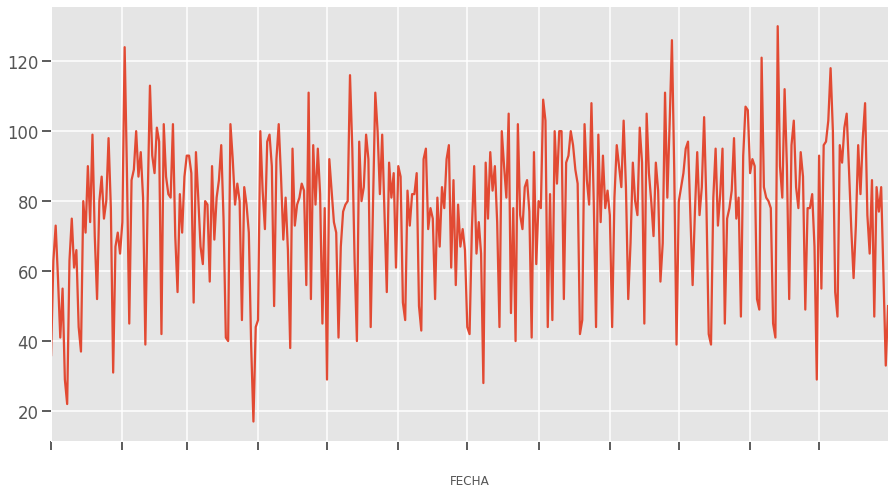

In [5]:
fig = plt.figure(figsize=(15,8))
c = df_choques.groupby(df_choques.loc[:,"FECHA"].dt.date).count().loc[:,"X"].plot.line()
c.set_xticklabels(c.get_xticklabels(),rotation=90)
plt.show()

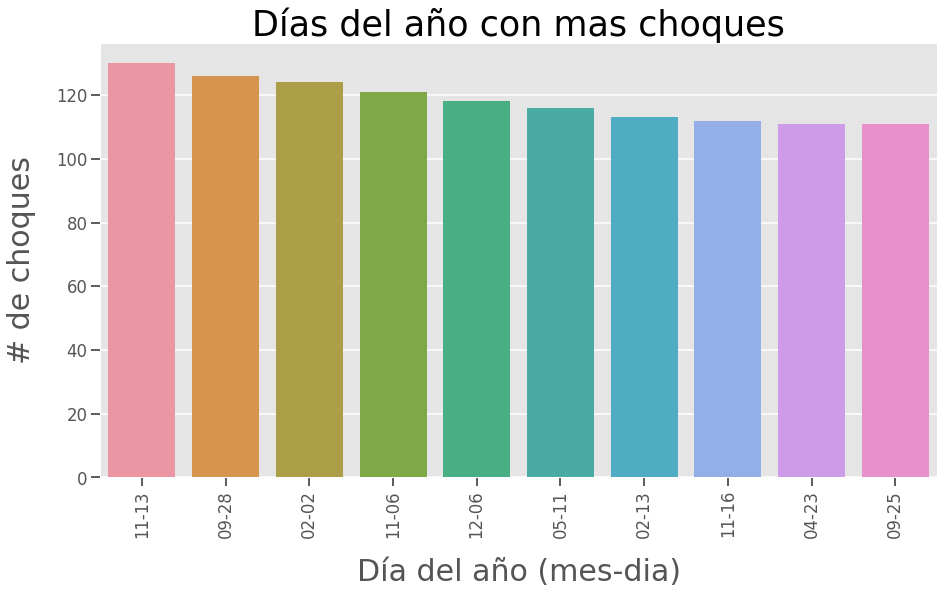

In [6]:
fig = plt.figure(figsize=(15,8))
c = sns.countplot(x="FECHA_norm", data=df_choques, order=df_choques["FECHA_norm"].value_counts().iloc[:10].index)
c.set_xlabel("Día del año (mes-dia)",fontsize=30)
c.set_ylabel("# de choques",fontsize=30)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
c.set_title("Días del año con mas choques", fontsize=35)
plt.show()

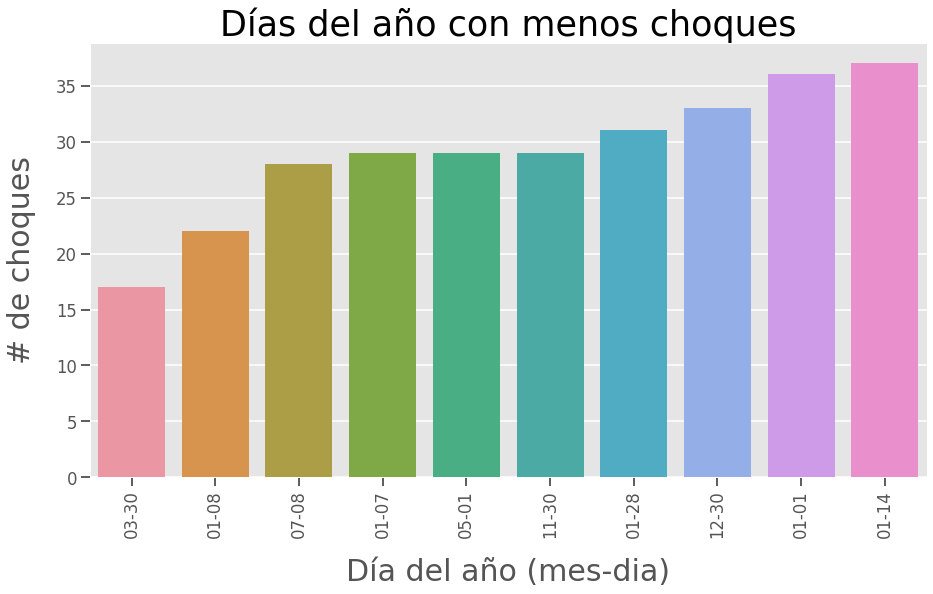

In [7]:
fig = plt.figure(figsize=(15,8))
c = sns.countplot(x="FECHA_norm", data=df_choques, order=df_choques["FECHA_norm"].value_counts(ascending = True).iloc[:10].index)
c.set_xlabel("Día del año (mes-dia)",fontsize=30)
c.set_ylabel("# de choques",fontsize=30)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
c.set_title("Días del año con menos choques", fontsize=35)
plt.show()

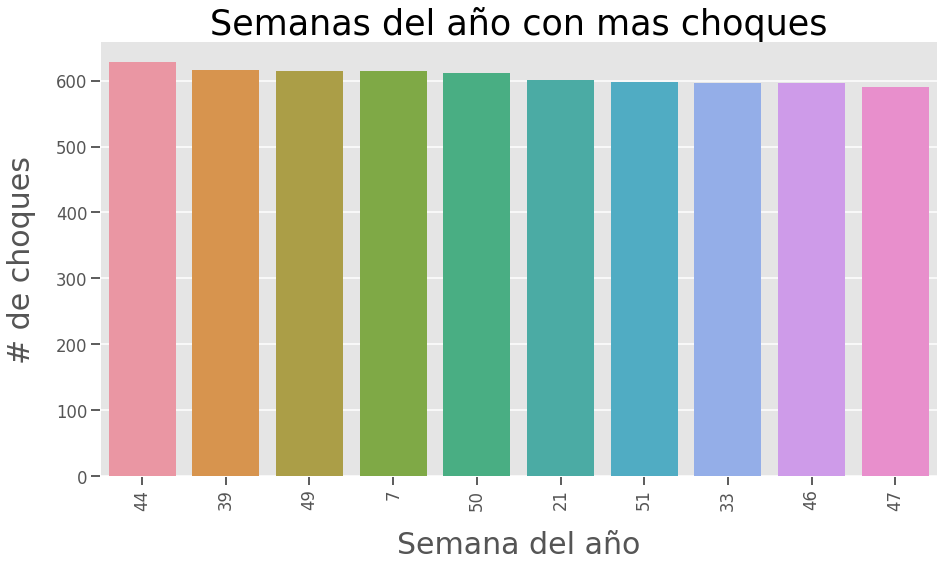

In [8]:
fig = plt.figure(figsize=(15,8))
df_choques_semanas = df_choques.copy()

c = sns.countplot(x="SEMANA", data=df_choques, order=df_choques["SEMANA"].value_counts().iloc[:10].index)
c.set_xlabel("Semana del año",fontsize=30)
c.set_ylabel("# de choques",fontsize=30)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
c.set_title("Semanas del año con mas choques", fontsize=35)
plt.show()

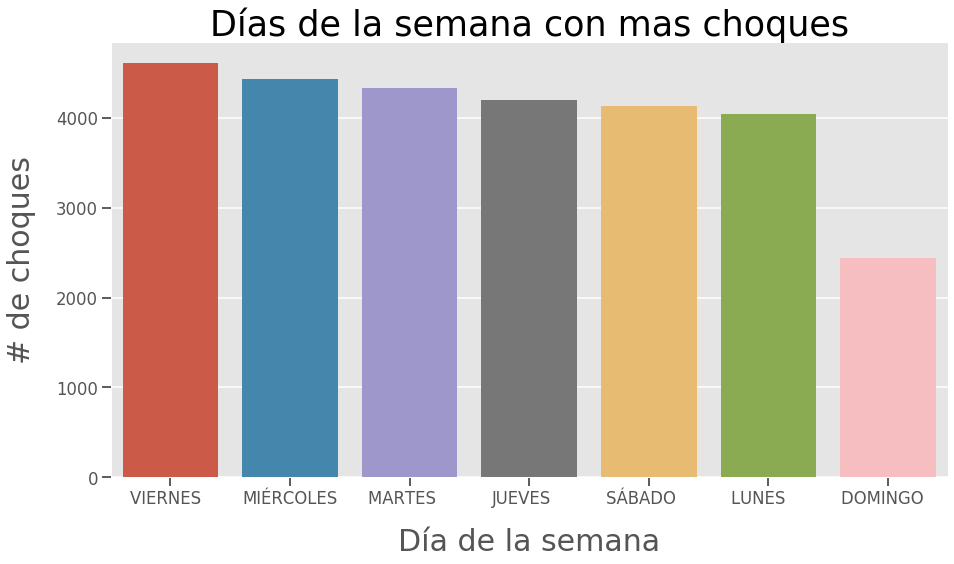

In [9]:
fig = plt.figure(figsize=(15,8))
c = sns.countplot(x="DIA_NOMBRE", data=df_choques,  order = df_choques['DIA_NOMBRE'].value_counts().index)
c.set_xlabel("Día de la semana",fontsize=30)
c.set_ylabel("# de choques",fontsize=30)
c.set_title("Días de la semana con mas choques", fontsize=35)
plt.show()

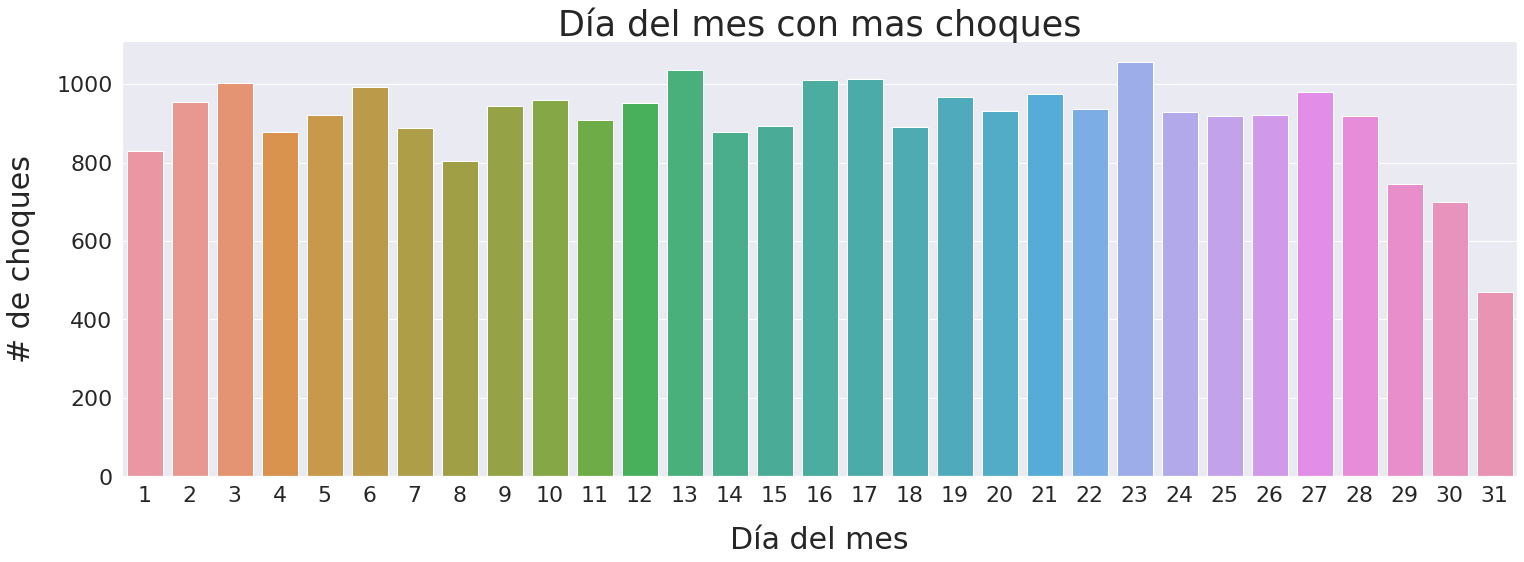

In [10]:
fig = plt.figure(figsize=(25,8))
sns.set(font_scale = 2)
c = sns.countplot(x="DIA", data=df_choques)
c.set_xlabel("Día del mes",fontsize=30)
c.set_ylabel("# de choques",fontsize=30)
c.set_title("Día del mes con mas choques", fontsize=35)
plt.show()

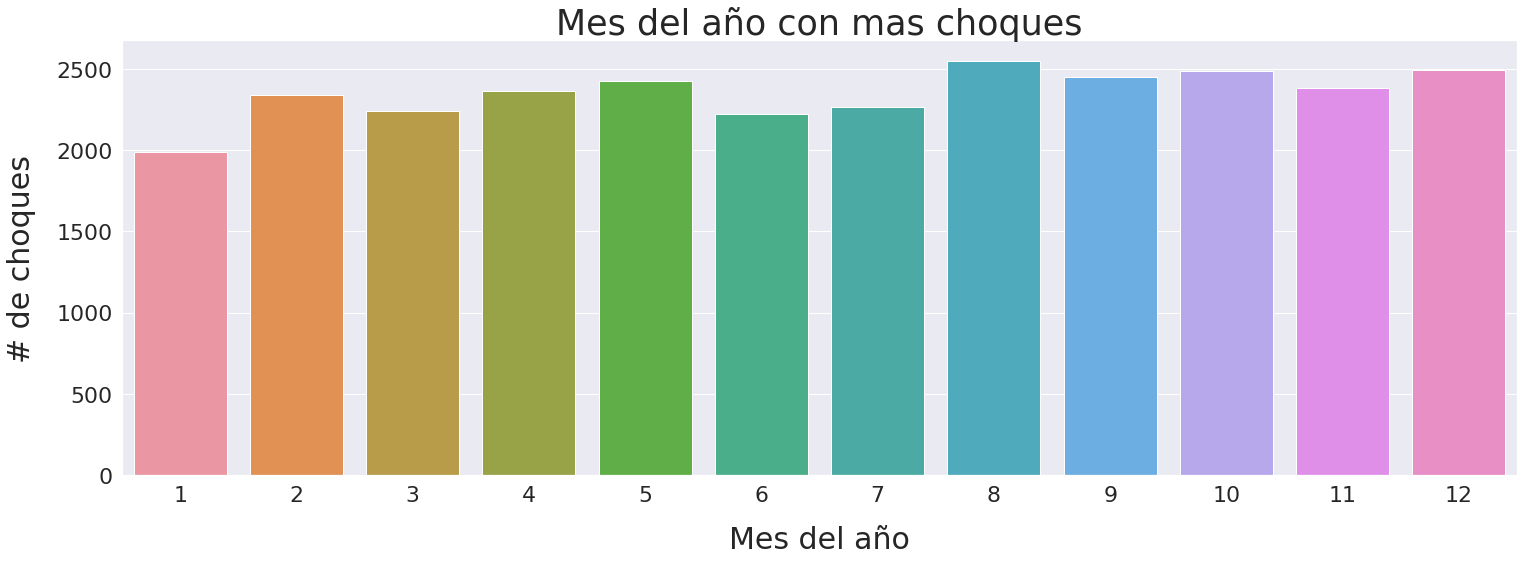

In [11]:
fig = plt.figure(figsize=(25,8))
sns.set(font_scale = 2)
c = sns.countplot(x="MES", data=df_choques)
c.set_xlabel("Mes del año",fontsize=30)
c.set_ylabel("# de choques",fontsize=30)
c.set_title("Mes del año con mas choques", fontsize=35)
plt.show()

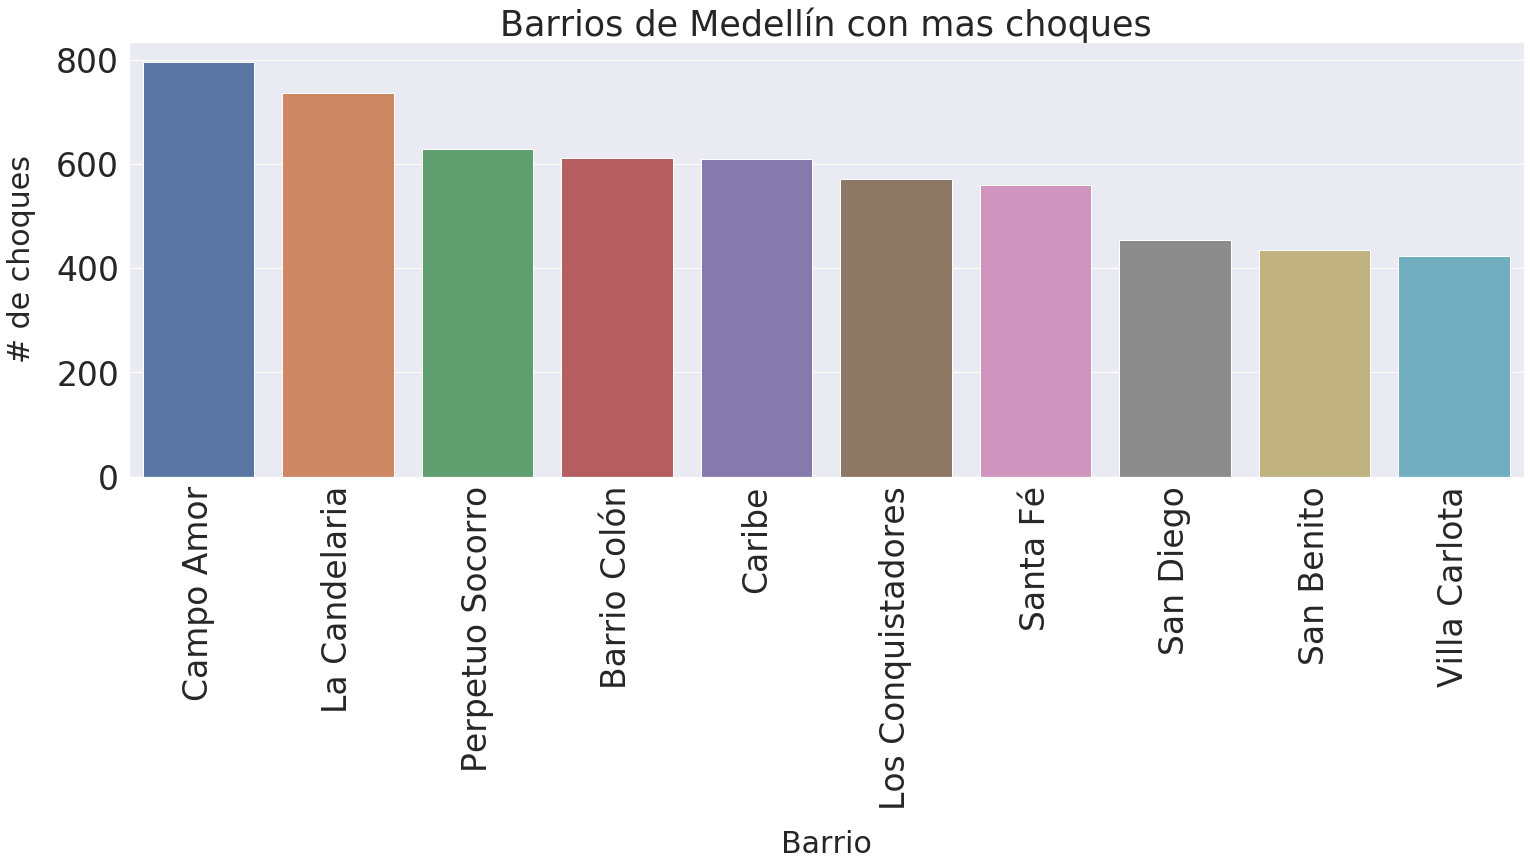

In [12]:
fig = plt.figure(figsize=(25,8))
sns.set(font_scale = 3)
c = sns.countplot(x="BARRIO", data=df_choques, order=df_choques["BARRIO"].value_counts().iloc[:10].index)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
c.set_xlabel("Barrio",fontsize=30)
c.set_ylabel("# de choques",fontsize=30)
c.set_title("Barrios de Medellín con mas choques", fontsize=35)
plt.show()

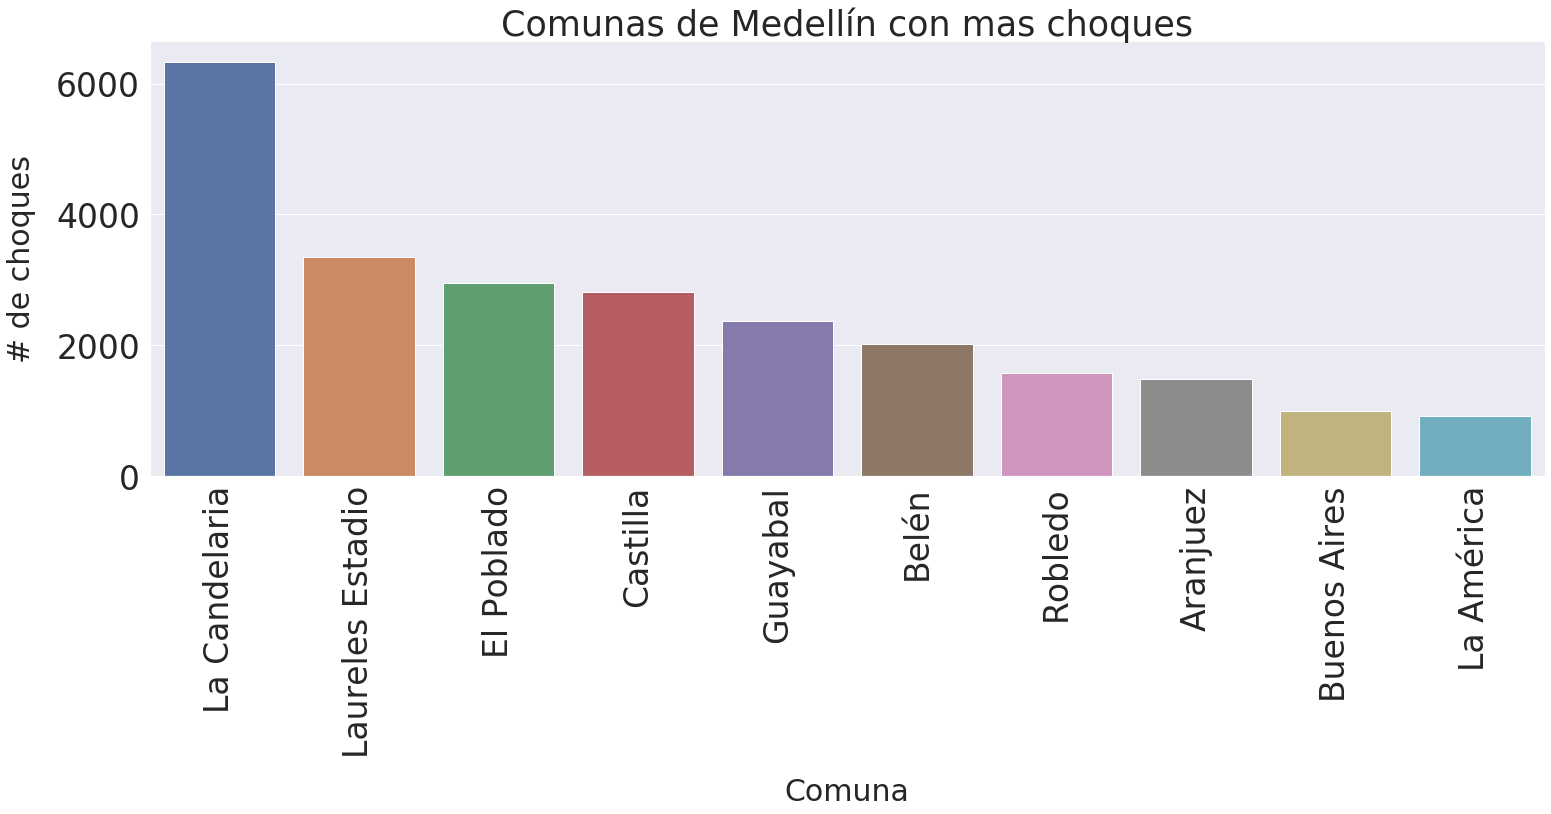

In [13]:
fig = plt.figure(figsize=(25,8))
sns.set(font_scale = 3)
c = sns.countplot(x="COMUNA", data=df_choques, order=df_choques["COMUNA"].value_counts().iloc[:10].index)
c.set_xticklabels(c.get_xticklabels(),rotation=90)
c.set_xlabel("Comuna",fontsize=30)
c.set_ylabel("# de choques",fontsize=30)
c.set_title("Comunas de Medellín con mas choques", fontsize=35)
plt.show()

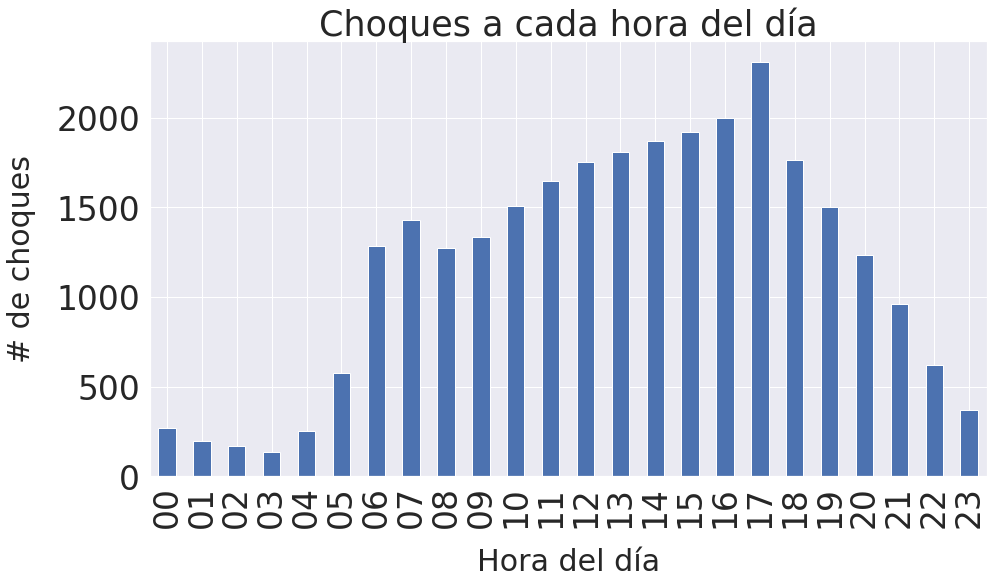

In [14]:
df_choques_date = df_choques.copy()
fig = plt.figure(figsize=(15,8))
sns.set(font_scale = 3)
df_choques_date.set_index('HORA', drop=False, inplace=True)
df_30 = df_choques_date.groupby(pd.Grouper(freq='60Min')).count()["X"]
df_30.index = df_30.index.floor('T').time
df_30.index = df_30.index.map(lambda x: str(x)[:-6])
t = df_30.plot(kind='bar')
t.set_xlabel("Hora del día",fontsize=30)
t.set_ylabel("# de choques",fontsize=30)
t.set_title("Choques a cada hora del día", fontsize=35)
plt.show()